

#Load libraries

In [21]:
#Set up google colab working environment
!pwd
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git
%cd /content/Colombian-peso-counterfeit-detection/Code
!pwd


/content/Colombian-peso-counterfeit-detection/Code
fatal: destination path 'Colombian-peso-counterfeit-detection' already exists and is not an empty directory.
/content/Colombian-peso-counterfeit-detection/Code
/content/Colombian-peso-counterfeit-detection/Code


In [22]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf

#Load in data

In [23]:
train_ds, test_ds, validation_ds, class_names =  cf.LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run logistic regression model

In [24]:
#initialize model
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(480, 640, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units = 13,
        activation = "softmax"
)])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [26]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5
)

Epoch 1/5
390/390 [==============================] - 190s 486ms/step - loss: 18.9688 - accuracy: 0.6362 - val_loss: 6.9001 - val_accuracy: 0.7478
Epoch 2/5
390/390 [==============================] - 171s 436ms/step - loss: 12.8414 - accuracy: 0.7618 - val_loss: 7.6372 - val_accuracy: 0.8046
Epoch 3/5
390/390 [==============================] - 179s 456ms/step - loss: 8.8145 - accuracy: 0.8262 - val_loss: 16.7490 - val_accuracy: 0.7130
Epoch 4/5
390/390 [==============================] - 177s 451ms/step - loss: 8.5080 - accuracy: 0.8489 - val_loss: 5.7098 - val_accuracy: 0.8659
Epoch 5/5
390/390 [==============================] - 185s 471ms/step - loss: 8.8392 - accuracy: 0.8662 - val_loss: 2.8202 - val_accuracy: 0.9022


Evaluate model

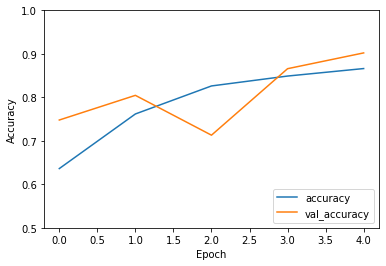

130/130 - 24s - loss: 2.6494 - accuracy: 0.9031 - 24s/epoch - 182ms/step
Test loss: 2.649380683898926 | Test accuracy: 0.903124988079071


In [27]:
cf.EvaluateModel(model, test_ds, history)
